In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import PIL.Image as img
%matplotlib inline

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as tfk
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
INPUT_SHAPE = (224, 224)

classifier = tfk.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4", input_shape = INPUT_SHAPE+(3,))
])

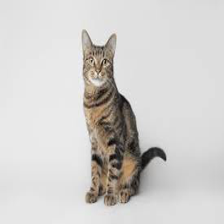

In [10]:
cat = img.open('cat.jpg').resize(INPUT_SHAPE)
cat

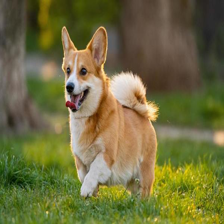

In [11]:
dog = img.open('dog.jpg').resize(INPUT_SHAPE)
dog

In [12]:
cat = np.array(cat)/255
cat

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196]],

       [[0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196]],

       ...,

       [[0.90196078, 0.90196078, 0.90196078],
        [0.90196078, 0.90196078, 0.90196078],
        [0.90196078, 0

In [13]:
dog = np.array(cat)/255
dog

array([[[0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        ...,
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256]],

       [[0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        ...,
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256]],

       [[0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        [0.00344483, 0.00344483, 0.00344483],
        ...,
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256],
        [0.00335256, 0.00335256, 0.00335256]],

       ...,

       [[0.0035371 , 0.0035371 , 0.0035371 ],
        [0.0035371 , 0.0035371 , 0.0035371 ],
        [0.0035371 , 0

In [17]:
cat.shape

(224, 224, 3)

In [18]:
cat[np.newaxis, ...].shape

(1, 224, 224, 3)

In [15]:
dog.shape

(224, 224, 3)

In [19]:
dog[np.newaxis, ...].shape

(1, 224, 224, 3)

In [20]:
dog_result = classifier.predict(dog[np.newaxis, ...])
dog_result

1/1 [==============================] - 13s 13s/step


array([[-0.18270403, -0.37335938,  0.76371026, ..., -0.9750714 ,
        -1.0757805 ,  1.3280535 ]], dtype=float32)

In [28]:
dog_pred = np.argmax(dog_result)
dog_pred

819

In [22]:
cat_result = classifier.predict(cat[np.newaxis, ...])
cat_result

1/1 [==============================] - 1s 616ms/step


array([[ 0.05451852,  0.27068067,  0.27005094, ..., -0.3291322 ,
        -0.11368578, -0.3413714 ]], dtype=float32)

In [26]:
cat_pred = np.argmax(cat_result)
cat_pred

282

In [24]:
images_label = []
with open('ImageNetLabels.txt') as f:
    images_label = f.read().splitlines()

images_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [30]:
images_label[cat_pred]

'tabby'

In [31]:
images_label[dog_pred]

'spotlight'

In [43]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
tf.keras.utils.get_file('cats_and_dogs', origin = dataset_url, cache_dir = '.', extract = True)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 75s 1us/step


'.\\datasets\\cats_and_dogs'

In [44]:
import pathlib
data_dir = pathlib.Path('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train')
data_dir

WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train')

In [45]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.1.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.10.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.100.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.101.jpg')]

In [46]:
len(list(data_dir.glob('*/*.jpg')))

2000

In [47]:
cat_img = list(data_dir.glob('cats/*.jpg'))[:5]
cat_img

[WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.1.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.10.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.100.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.101.jpg')]

In [48]:
dog_img = list(data_dir.glob('dogs/*.jpg'))[:5]
dog_img

[WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.0.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.1.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.10.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.100.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.101.jpg')]

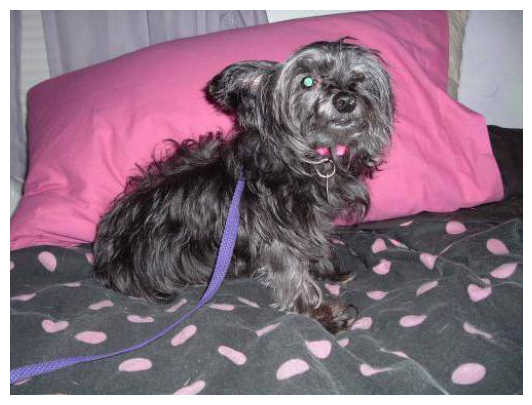

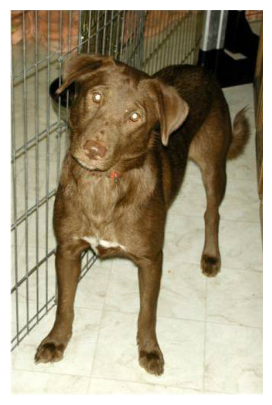

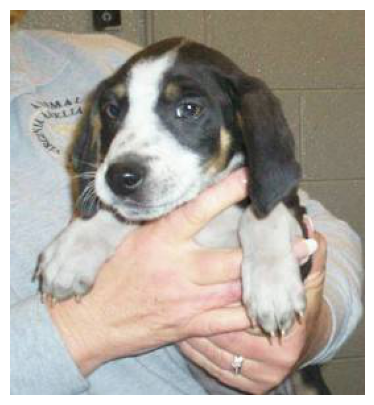

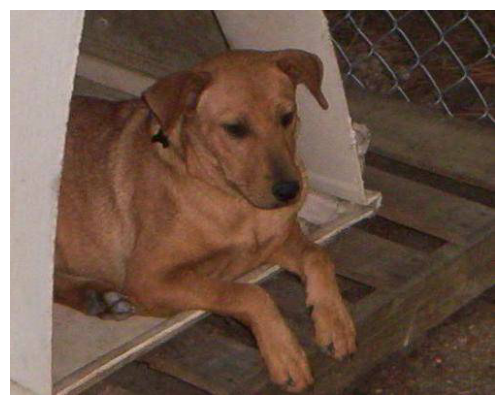

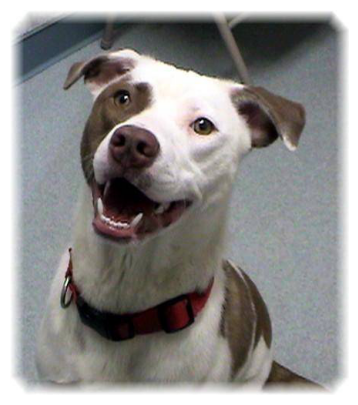

In [50]:
for i in range(0,5):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(img.open(str(dog_img[i])))
    plt.show

In [52]:
for i in range(0,5):
    print(f'index-{i}: {img.open(str(dog_img[i])).size}')

index-0: (499, 375)
index-1: (327, 499)
index-2: (269, 292)
index-3: (500, 397)
index-4: (440, 500)


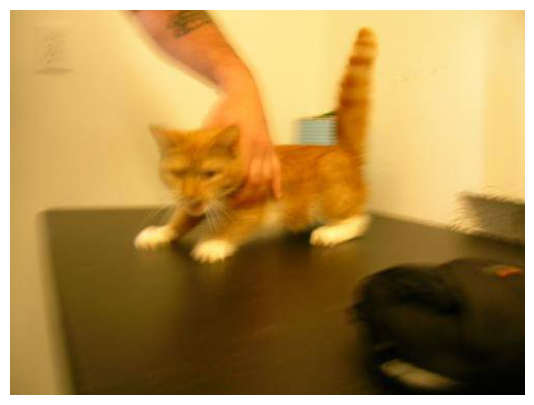

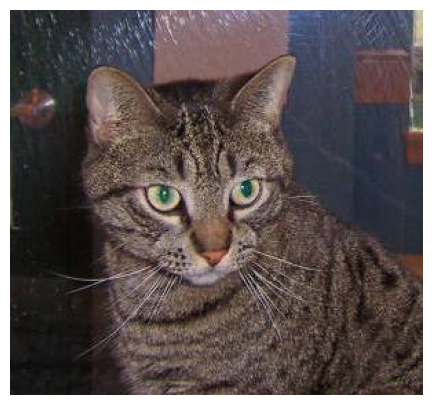

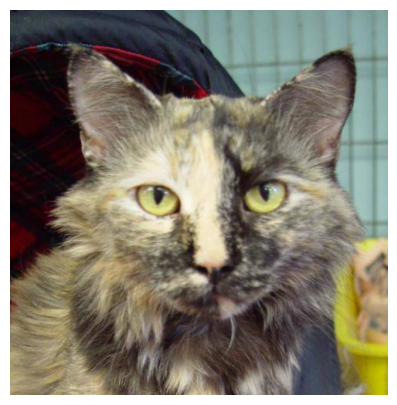

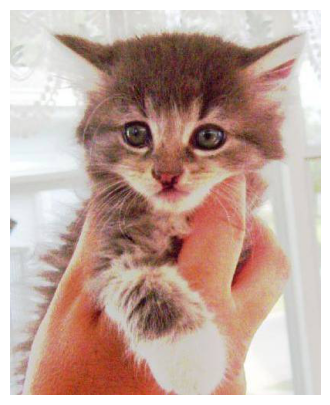

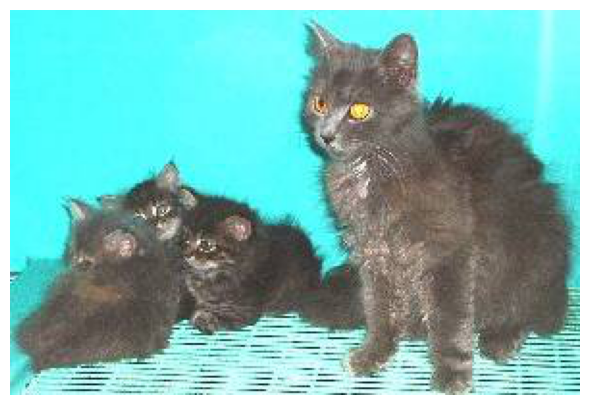

In [51]:
for i in range(0,5):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(img.open(str(cat_img[i])))
    plt.show

In [53]:
for i in range(0,5):
    print(f'index-{i}: {img.open(str(cat_img[i])).size}')

index-0: (500, 374)
index-1: (300, 280)
index-2: (489, 499)
index-3: (403, 499)
index-4: (296, 200)


In [54]:
catdog_dict = {
    'cats': list(data_dir.glob('cats/*')),
    'dogs': list(data_dir.glob('dogs/*')),
}

In [56]:
catdog_dict['cats']

[WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.1.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.10.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.100.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.101.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.102.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.103.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision

In [57]:
catdog_dict['dogs']

[WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.0.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.1.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.10.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.100.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.101.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.102.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/dogs/dog.103.jpg'),
 WindowsPath('E:/Deep Learning/Computer Vision

In [70]:
catdog_label_dict = {
    'cats': 0,
    'dogs': 1,
}

In [71]:
catdog_label_dict['cats']

0

In [61]:
catdog_dict.items()

dict_items([('cats', [WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.1.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.10.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.100.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.101.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.102.jpg'), WindowsPath('E:/Deep Learning/Computer Vision/Transfer Learning/Cats and Dogs/datasets/cats_and_dogs_filtered/train/cats/cat.103.jpg'), WindowsPath('E:/Deep Learning/C

In [64]:
h = catdog_dict['cats'][0]

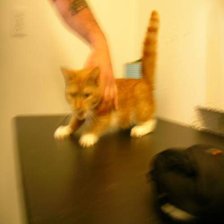

In [67]:
img.open(h).resize(INPUT_SHAPE)

In [69]:
cv2.imread(str(h))

array([[[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [121, 200, 239]],

       ...,

       [[ 55, 122, 153],
        [ 55, 122, 153],
        [ 55, 122, 153],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 54, 121, 152],
        [ 54, 121, 152],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 53, 120, 151],
        [ 53, 120, 151],
        [ 53, 120, 151],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]]

In [73]:
x = []
y = []

for name, i in catdog_dict.items():
    for j in i:
        images = cv2.imread(str(j))
        resize_img = cv2.resize(images, INPUT_SHAPE)
        x.append(resize_img)
        y.append(catdog_label_dict[name])

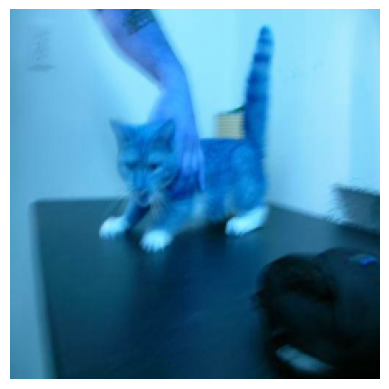

In [77]:
plt.axis('off')
plt.imshow(x[0])

In [78]:
x[0].shape

(224, 224, 3)

In [81]:
y[0]

0

In [82]:
x1 = np.array(x)
y1 = np.array(y)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1 ,test_size = 0.2, random_state = 42)

In [84]:
x_train.shape

(1600, 224, 224, 3)

In [85]:
x_test.shape

(400, 224, 224, 3)

In [86]:
y_test.shape

(400,)

In [87]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [89]:
x_train_scaled[0]

array([[[0.14901961, 0.17254902, 0.14901961],
        [0.15294118, 0.17647059, 0.15686275],
        [0.15686275, 0.16862745, 0.15294118],
        ...,
        [0.18039216, 0.18431373, 0.16862745],
        [0.17254902, 0.18823529, 0.16862745],
        [0.16470588, 0.18039216, 0.16078431]],

       [[0.14901961, 0.17254902, 0.15294118],
        [0.15294118, 0.18039216, 0.15686275],
        [0.16078431, 0.17647059, 0.15686275],
        ...,
        [0.18823529, 0.19215686, 0.17647059],
        [0.18039216, 0.19215686, 0.17647059],
        [0.17254902, 0.17647059, 0.15686275]],

       [[0.15294118, 0.17647059, 0.15686275],
        [0.16078431, 0.18431373, 0.16470588],
        [0.16862745, 0.18431373, 0.16470588],
        ...,
        [0.19607843, 0.2       , 0.18431373],
        [0.18823529, 0.20392157, 0.18431373],
        [0.17647059, 0.18039216, 0.16470588]],

       ...,

       [[0.2745098 , 0.29411765, 0.28627451],
        [0.29803922, 0.31764706, 0.30980392],
        [0.2745098 , 0

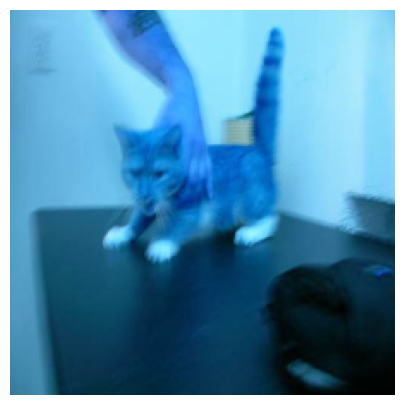

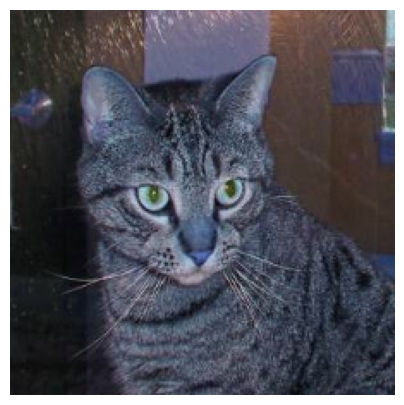

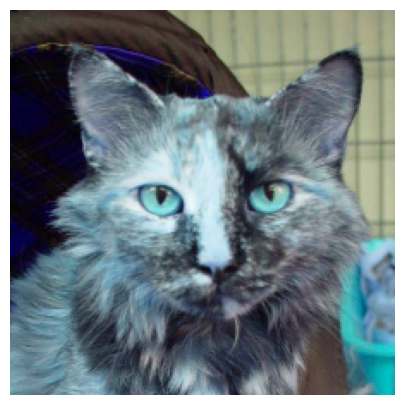

In [90]:
for i in range(0,3):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(x[i])

In [91]:
predicted = classifier.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 4s 4s/step


array([795, 795, 722], dtype=int64)

In [92]:
h = []
for i in predicted:
    j = images_label[i]
    h.append(j)

print(h)

['shower curtain', 'shower curtain', 'pillow']


In [93]:
pre_trained = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    pre_trained, input_shape = (224, 224, 3), trainable =  False)

In [94]:
model = tfk.Sequential([
   pretrained_model_without_top_layer,
   tfk.layers.Dense(2) 
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [95]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5



50/50 [==============================] - 56s 493ms/step - loss: 0.1456 - accuracy: 0.9419
Epoch 2/5
50/50 [==============================] - 24s 488ms/step - loss: 0.0447 - accuracy: 0.9819
Epoch 3/5
50/50 [==============================] - 25s 490ms/step - loss: 0.0326 - accuracy: 0.9887
Epoch 4/5
50/50 [==============================] - 24s 482ms/step - loss: 0.0247 - accuracy: 0.9944
Epoch 5/5
50/50 [==============================] - 24s 483ms/step - loss: 0.0188 - accuracy: 0.9975


In [96]:
model.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 8s 467ms/step - loss: 0.0724 - accuracy: 0.9750


[0.07244721055030823, 0.9750000238418579]

In [97]:
pred = model.predict(x_test_scaled)

13/13 [==============================] - 7s 456ms/step


In [98]:
y_pred = [np.argmax(i) for i in pred]
y_pred[:5]

[1, 0, 1, 0, 1]

In [99]:
y_test[:5]

array([1, 0, 1, 0, 1])

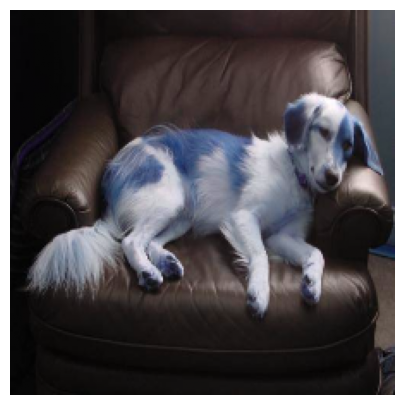

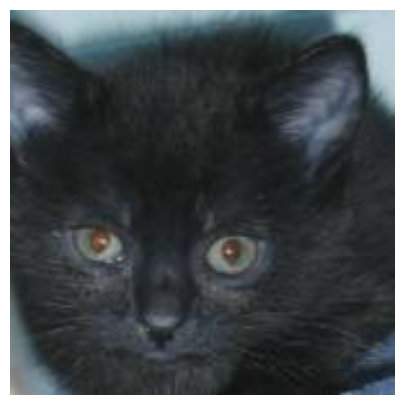

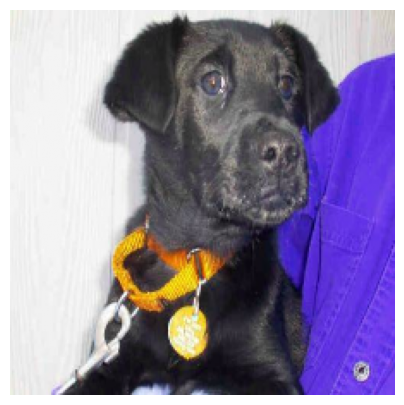

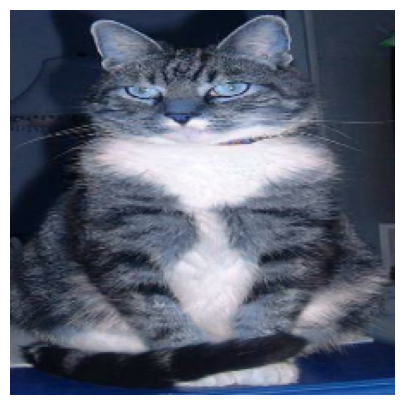

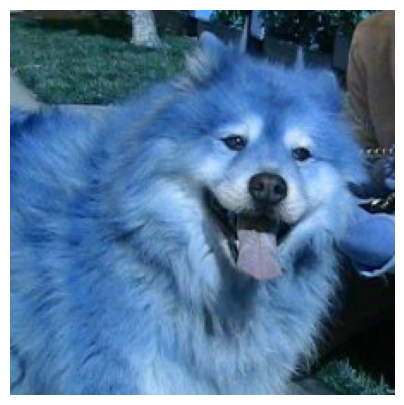

In [100]:
for i in range(0,5):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(x_test_scaled[i])

In [101]:
cd_list = ['cats', 'dogs']
cat_dog = []

for i in y_pred[:5]:
    j = cd_list[i]
    cat_dog.append(j)

print(cat_dog)

['dogs', 'cats', 'dogs', 'cats', 'dogs']


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       199
           1       0.98      0.97      0.97       201

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400

